<a href="https://colab.research.google.com/github/valkhan13/US_Finance/blob/main/US_revenues_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd

In [7]:
endpoint = '/v2/revenue/rcm'

api_url = f'https://api.fiscaldata.treasury.gov/services/api/fiscal_service{endpoint}'

In [8]:
data = requests.get(api_url).json()

In [11]:
data.keys()

dict_keys(['data', 'meta', 'links'])

In [12]:
pd.DataFrame(data['data'])

,record_date,electronic_category_desc,channel_type_desc,tax_category_desc,net_collections_amt,electronic_category_id,channel_type_id,tax_category_id,src_line_nbr,record_fiscal_year,record_fiscal_quarter,record_calendar_year,record_calendar_quarter,record_calendar_month,record_calendar_day
0,2004-10-01,Non-Electronic,Mail,Non-Tax,111474583.79,4,2,1,4,2005,1,2004,4,10,01
1,2004-10-01,Fully Electronic - All,Bank,IRS Tax,4838830545.34,1,5,3,12,2005,1,2004,4,10,01
2,2004-10-01,Fully Electronic - All,Over-the-Counter (OTC),Non-Tax,16138199.62,1,1,1,5,2005,1,2004,4,10,01
3,2004-10-01,Non-Electronic,Over-the-Counter (OTC),Non-Tax,435460013.97,4,1,1,6,2005,1,2004,4,10,01
4,2004-10-01,Fully Electronic - All,Over-the-Counter (OTC),IRS Tax,38171207.92,1,1,3,11,2005,1,2004,4,10,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2004-10-08,Non-Electronic,Over-the-Counter (OTC),IRS Non-Tax,19707.67,4,1,2,10,2005,1,2004,4,10,08
96,2004-10-08,Fully Electronic - All,Over-the-Counter (OTC),IRS Non-Tax,1141.07,1,1,2,7,2005,1,2004,4,10,08
97,2004-10-08,Fully Electronic - FS,Over-the-Counter (OTC),IRS Non-Tax,16707.62,2,1,2,8,2005,1,2004,4,10,08
98,2004-10-08,Non-Electronic,Mail,IRS Non-Tax,9473.74,4,2,2,9,2005,1,2004,4,10,08


In [28]:
api_url2 = f'https://api.fiscaldata.treasury.gov/services/api/fiscal_service{endpoint}?fields=tax_category_desc,net_collections_amt,record_fiscal_year&filter=record_fiscal_year:gte:2014'

In [29]:
data2 = requests.get(api_url2).json()

In [33]:
pd.DataFrame(data2['data'])

,tax_category_desc,net_collections_amt,record_fiscal_year
0,IRS Non-Tax,6424289.84,2025
1,IRS Non-Tax,94520640.27,2023
2,IRS Non-Tax,96588036.48,2024
3,IRS Non-Tax,128809858.63,2017
4,IRS Non-Tax,135457315.49,2015
5,IRS Non-Tax,99321185.52,2019
6,IRS Non-Tax,98465277.08,2018
7,IRS Non-Tax,105917807.43,2022
8,IRS Non-Tax,123289499.45,2016
9,IRS Non-Tax,154236765.14,2021


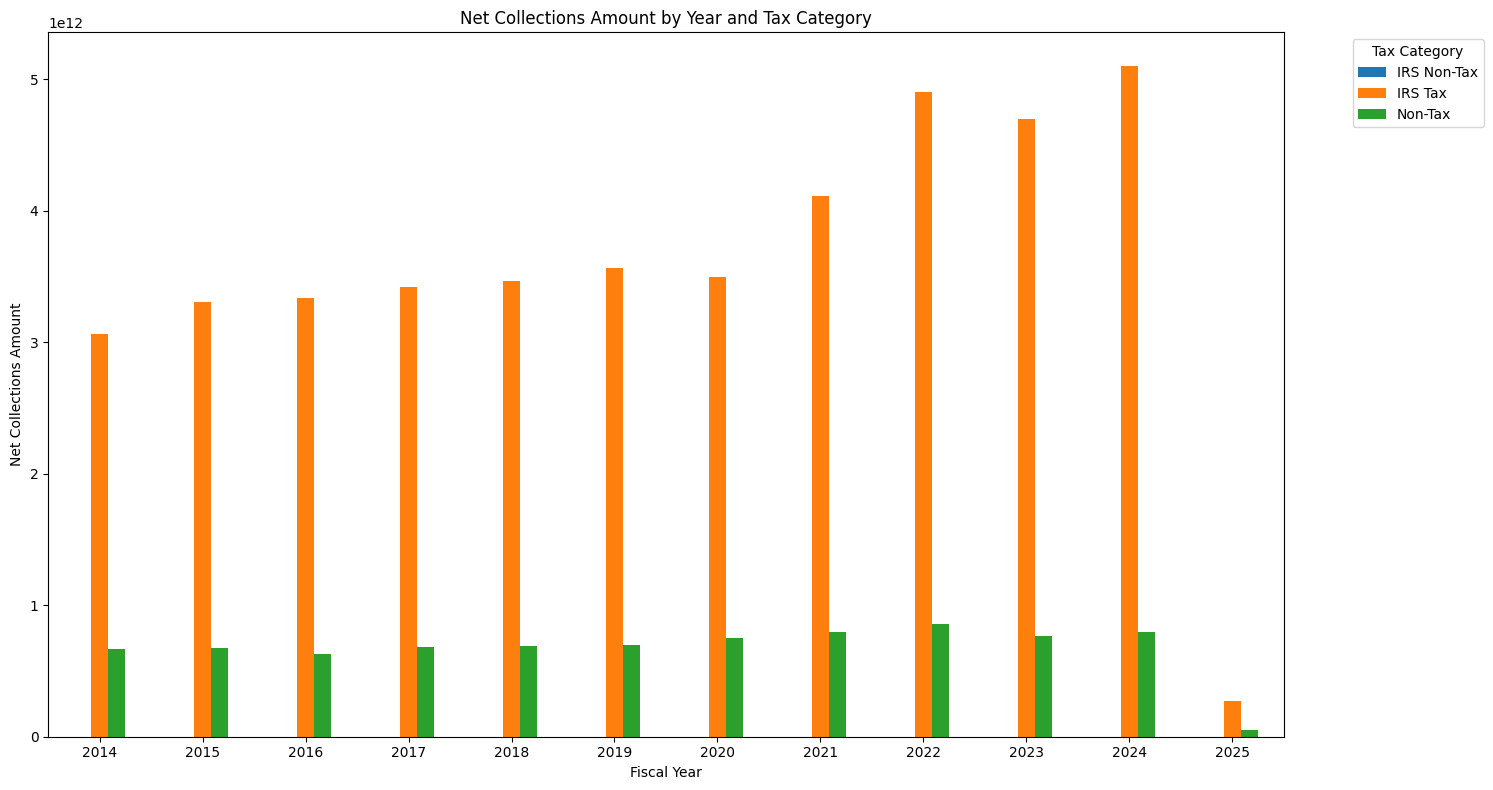

In [35]:
# prompt: I need a chart showing net_collections_amt for every year and every bar should show tax_category_desc. I want every tax_category_desc to be on the same bar, but different collar

import requests
import pandas as pd
import matplotlib.pyplot as plt

endpoint = '/v2/revenue/rcm'

api_url = f'https://api.fiscaldata.treasury.gov/services/api/fiscal_service{endpoint}?fields=tax_category_desc,net_collections_amt,record_fiscal_year&filter=record_fiscal_year:gte:2014'
data2 = requests.get(api_url).json()
df = pd.DataFrame(data2['data'])

# Convert 'net_collections_amt' to numeric, handling potential errors
df['net_collections_amt'] = pd.to_numeric(df['net_collections_amt'], errors='coerce')

# Group data by year and tax category
grouped_data = df.groupby(['record_fiscal_year', 'tax_category_desc'])['net_collections_amt'].sum().unstack()

# Create the bar chart
ax = grouped_data.plot(kind='bar', figsize=(15, 8))

# Customize the chart
plt.title('Net Collections Amount by Year and Tax Category')
plt.xlabel('Fiscal Year')
plt.ylabel('Net Collections Amount')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Tax Category', bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside plot area
plt.tight_layout() # Adjust layout to prevent labels from overlapping

plt.show()